# TASK 1: EXPLORE  A SMALL  DATASET

    When you do **data mining** (DM), you will need to check for data quality, manipulate data, as well as to build and evaluate models. In this first assignment, the aim is that you get familiar with your chosen DM software. You should learn to use it on a basic level, and carry out elementary DM tasks, so you will be prepared to take on more challenging ones coming to you in the form of subsequent assignments.
    
## TASK 1A: EXPLORATION 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("./datas/ODI-2022.csv",on_bad_lines='skip',sep=';')
data.head()

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,What is your stress level (0-100)?,"You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 17 columns):
 #   Column                                                                                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                                                                                            --------------  ----- 
 0   Tijdstempel                                                                                                                                                                                       304 non-null    object
 1   What programme are you in?                                                                                                                                                                        304 non-null    object
 2   Ha

In [4]:
data.describe()

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,What is your stress level (0-100)?,"You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
count,304,304,304,304,304,304,304,304,304,304,304,304,303,304,302,304,304
unique,165,123,3,3,3,3,5,5,295,30,3,77,109,142,177,201,235
top,4-5-2022 12:16:06,AI,yes,0,mu,ja,male,neither,08-05-1998,0,no,10,100,7,23:00,Sun,Food
freq,9,39,185,202,243,158,183,105,3,126,236,22,50,19,21,14,11


In [5]:
data.shape # dimension of data

(304, 17)

In [6]:
data.columns

Index(['Tijdstempel', 'What programme are you in?',
       'Have you taken a course on machine learning?',
       'Have you taken a course on information retrieval?',
       'Have you taken a course on statistics?',
       'Have you taken a course on databases?', 'What is your gender?',
       'Chocolate makes you.....', 'When is your birthday (date)?',
       'Number of neighbors sitting around you?', 'Did you stand up?',
       'What is your stress level (0-100)?',
       'You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then? ',
       'Give a random number', 'Time you went to be Yesterday',
       'What makes a good day for you (1)?',
       'What makes a good day for you (2)?'],
      dtype='object')

In [7]:
# Renaming columns names to more readable names
data.columns =['timestamp','programme','ml_course','ir_course','stat_course','db_course',
               'gender','chocolate','birth_date','neighbours','standed_up','stress_level',
               'money','rand_num','time_yesterday','good_day','good_day2']

data.head()

,timestamp,programme,ml_course,ir_course,stat_course,db_course,gender,chocolate,birth_date,neighbours,standed_up,stress_level,money,rand_num,time_yesterday,good_day,good_day2
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food


In [8]:
data["programme"].value_counts()

AI                           39
Artificial Intelligence      31
Computational Science        23
Business Analytics           14
Computer Science             10
                             ..
Computer science - BDE        1
None                          1
computational science         1
Medical Natural Sciences      1
MSc Computational Science     1
Name: programme, Length: 123, dtype: int64

In [9]:
data.sort_values(by="programme").head(10)

,timestamp,programme,ml_course,ir_course,stat_course,db_course,gender,chocolate,birth_date,neighbours,standed_up,stress_level,money,rand_num,time_yesterday,good_day,good_day2
117,4-5-2022 12:15:37,AI,yes,0,mu,ja,female,fat,01/01/1998,1,no,0,50,23,3AM,food,being with the people i love
250,4-5-2022 12:16:18,AI,yes,0,mu,nee,male,neither,1989.9.2,4,no,80,70,9,9:00,food,sleep
61,4-5-2022 12:14:12,AI,yes,0,mu,ja,male,fat,19-02-1998,1,yes,20,1000,864687452,Gym,Food,Good coffee
84,4-5-2022 12:14:40,AI,yes,0,mu,nee,male,I have no idea what you are talking about,02/11/1896,5,unknown,1000,0,980000000000000789,00:00,Beer,Beer
34,4-5-2022 12:13:34,AI,no,0,sigma,ja,male,I have no idea what you are talking about,14.05.1996,5,no,70,20,2500,5,Weather,Beer
210,4-5-2022 12:16:03,AI,no,0,mu,nee,female,neither,21'12'1995,4,no,1,0,21,23.34,sunshine,fun stuff on the planning
175,4-5-2022 12:15:56,AI,yes,1,mu,ja,female,fat,18-06-1999,2,no,60,25,6,23:00,exercise,good food
153,4-5-2022 12:15:49,AI,yes,unknown,mu,nee,male,fat,19.10.1997,1,yes,30,1000,42,01:00,coding,food
81,4-5-2022 12:14:34,AI,yes,0,unknown,nee,male,neither,20/03/1998,2,yes,61,3.50,0293847509283475098324759083475298034759823475...,Wot,Cake,Pie
249,4-5-2022 12:16:17,AI,yes,1,mu,ja,male,neither,is prive,0,no,5,0,dont tell me what to do,?,studying,learning


### Checking for wrong entries like symbols -,?,#,*,etc.

In [10]:
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

timestamp : ['4-5-2022 12:12:07' '4-5-2022 12:12:09' '4-5-2022 12:12:15'
 '4-5-2022 12:12:20' '4-5-2022 12:12:26' '4-5-2022 12:12:29'
 '4-5-2022 12:12:31' '4-5-2022 12:12:32' '4-5-2022 12:12:34'
 '4-5-2022 12:12:36' '4-5-2022 12:12:42' '4-5-2022 12:12:50'
 '4-5-2022 12:12:51' '4-5-2022 12:12:57' '4-5-2022 12:13:04'
 '4-5-2022 12:13:08' '4-5-2022 12:13:11' '4-5-2022 12:13:14'
 '4-5-2022 12:13:15' '4-5-2022 12:13:16' '4-5-2022 12:13:18'
 '4-5-2022 12:13:19' '4-5-2022 12:13:24' '4-5-2022 12:13:26'
 '4-5-2022 12:13:29' '4-5-2022 12:13:34' '4-5-2022 12:13:35'
 '4-5-2022 12:13:37' '4-5-2022 12:13:39' '4-5-2022 12:13:41'
 '4-5-2022 12:13:43' '4-5-2022 12:13:44' '4-5-2022 12:13:45'
 '4-5-2022 12:13:47' '4-5-2022 12:13:49' '4-5-2022 12:13:50'
 '4-5-2022 12:13:51' '4-5-2022 12:13:54' '4-5-2022 12:13:57'
 '4-5-2022 12:13:58' '4-5-2022 12:13:59' '4-5-2022 12:14:00'
 '4-5-2022 12:14:05' '4-5-2022 12:14:06' '4-5-2022 12:14:10'
 '4-5-2022 12:14:11' '4-5-2022 12:14:12' '4-5-2022 12:14:14'
 '4-5-2022 1

There are null values in the dataset in form of `‘-’` only but pandas are not reading them so, will replace them into **np.nan** form.

In [11]:
for col in data.columns:
    data[col].replace({'-':None},inplace=True)
    
data.head()

,timestamp,programme,ml_course,ir_course,stat_course,db_course,gender,chocolate,birth_date,neighbours,standed_up,stress_level,money,rand_num,time_yesterday,good_day,good_day2
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food


In [12]:
print(data['ml_course'].unique())
data['ml_course'] = data['ml_course'].replace(to_replace="yes",value=1)
data['ml_course'] = data['ml_course'].replace(to_replace="no",value=0)
data['ml_course'] = data['ml_course'].replace(to_replace="unknown",value=np.nan)
print(data['ml_course'].unique())

['yes' 'no' 'unknown']
[ 1.  0. nan]


In [13]:
print(data['ir_course'].unique())
data['ir_course'] = data['ir_course'].replace(to_replace="1",value=1)
data['ir_course'] = data['ir_course'].replace(to_replace="0",value=0)
data['ir_course'] = data['ir_course'].replace(to_replace="unknown",value=np.nan)
print(data['ir_course'].unique())

['0' '1' 'unknown']
[ 0.  1. nan]


In [14]:
print(data['stat_course'].unique())
data['stat_course'] = data['stat_course'].replace(to_replace="mu",value=1)
data['stat_course'] = data['stat_course'].replace(to_replace="sigma",value=0)
data['stat_course'] = data['stat_course'].replace(to_replace="unknown",value=np.nan)
print(data['stat_course'].unique())

['mu' 'unknown' 'sigma']
[ 1. nan  0.]


In [15]:
print(data['db_course'].unique())
data['db_course'] = data['db_course'].replace(to_replace="nee",value=1)
data['db_course'] = data['db_course'].replace(to_replace="ja",value=0)
data['db_course'] = data['db_course'].replace(to_replace="unknown",value=np.nan)
print(data['db_course'].unique())

['nee' 'ja' 'unknown']
[ 1.  0. nan]


In [16]:
print(data['chocolate'].unique())
data['chocolate'] = data['chocolate'].replace(to_replace="unknown",value=np.nan)
print(data['chocolate'].unique())

['neither' 'fat' 'I have no idea what you are talking about' 'slim'
 'unknown']
['neither' 'fat' 'I have no idea what you are talking about' 'slim' nan]


In [17]:
print(data['standed_up'].unique())
data['standed_up'] = data['standed_up'].replace(to_replace="yes",value=1)
data['standed_up'] = data['standed_up'].replace(to_replace="no",value=0)
data['standed_up'] = data['standed_up'].replace(to_replace="unknown",value=np.nan)
print(data['standed_up'].unique())

['no' 'yes' 'unknown']
[ 0.  1. nan]


### Checking Missing Values

In [18]:
data.isnull().sum()

timestamp          0
programme          0
ml_course          7
ir_course         27
stat_course       28
db_course          7
gender             0
chocolate          6
birth_date         0
neighbours         0
standed_up        26
stress_level       0
money              2
rand_num           0
time_yesterday     3
good_day           1
good_day2          2
dtype: int64

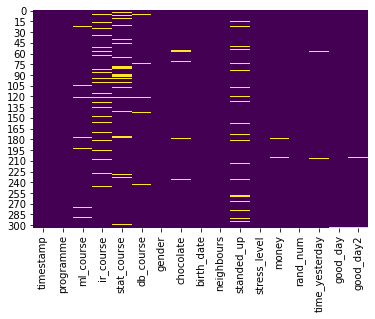

In [19]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis');

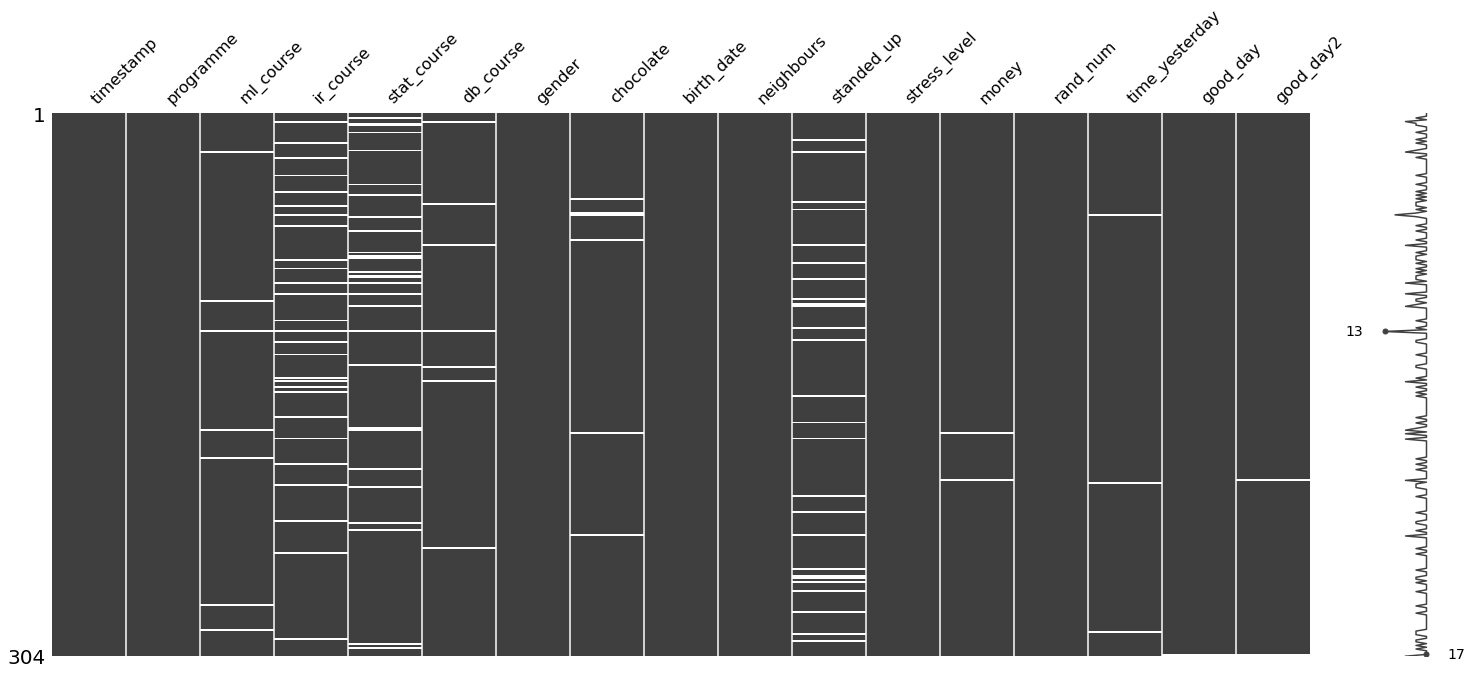

In [20]:
msno.matrix(df=data);

### Handling Missing Value

In [21]:
data.dropna().head(10)

,timestamp,programme,ml_course,ir_course,stat_course,db_course,gender,chocolate,birth_date,neighbours,standed_up,stress_level,money,rand_num,time_yesterday,good_day,good_day2
0,4-5-2022 12:12:07,artificial intelligence,1.0,0.0,1.0,1.0,female,neither,02.05.1998,0,0.0,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,1.0,0.0,1.0,1.0,male,fat,29-02-2000,0,1.0,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,1.0,1.0,1.0,0.0,male,fat,29-06-1998,1,0.0,0,100,9,x,0,0
4,4-5-2022 12:12:15,AI,1.0,1.0,1.0,0.0,male,fat,03-10-1997,0,0.0,2,100,86,07:20,Sunshine,Good Food
8,4-5-2022 12:12:29,FinTech,1.0,0.0,1.0,0.0,male,neither,1995,0,0.0,20,100 / the number of people,42,23:00,Food,Relaxation
9,4-5-2022 12:12:29,Artificial Intelligence,0.0,0.0,1.0,0.0,female,fat,21-07-2000,5,1.0,50,10,88,12 hours,"sun, friends and wine","relaxing, watching a show, hockey"
10,4-5-2022 12:12:31,Artificial Intelligence MsC,0.0,0.0,1.0,1.0,male,I have no idea what you are talking about,29-05-1998,0,0.0,60,1000,1,Banana,Coffee,Not coffee
12,4-5-2022 12:12:34,ai,1.0,1.0,1.0,0.0,male,I have no idea what you are talking about,0102,0,0.0,5000,100,7,to be?,drugs,beer
13,4-5-2022 12:12:36,programme?,0.0,0.0,1.0,1.0,male,fat,19/10/1982,0,1.0,65,100,8,00:00,Good sleep,Good work
14,4-5-2022 12:12:42,Masters in Artificial Intelligence,1.0,0.0,1.0,0.0,male,fat,22/02/1999,0,1.0,70,100,420,12:00,Good mental state.,A challenge.


### Handling Duplicate Records

In [22]:
duplicate = data.duplicated()
print(duplicate.sum()) # there is no duplicate data

0


### Correlation

In [23]:
data.corr()

,ml_course,ir_course,stat_course,db_course,standed_up
ml_course,1.000000,0.289754,0.055331,-0.208864,0.003147
ir_course,0.289754,1.000000,0.064373,-0.377607,-0.087102
stat_course,0.055331,0.064373,1.000000,-0.067132,-0.010364
db_course,-0.208864,-0.377607,-0.067132,1.000000,0.034677
standed_up,0.003147,-0.087102,-0.010364,0.034677,1.000000


In [24]:
data = data.astype({"stress_level": str}, errors='raise')

In [25]:
data.dtypes

timestamp          object
programme          object
ml_course         float64
ir_course         float64
stat_course       float64
db_course         float64
gender             object
chocolate          object
birth_date         object
neighbours         object
standed_up        float64
stress_level       object
money              object
rand_num           object
time_yesterday     object
good_day           object
good_day2          object
dtype: object

### Data Cleaning

In [26]:
numerical_vars = data.columns[data.dtypes != 'object']
categorical_vars = data.columns[data.dtypes == 'object']

print("Numerical Variables:", numerical_vars)
print("Categorical Variables:", categorical_vars)

Numerical Variables: Index(['ml_course', 'ir_course', 'stat_course', 'db_course', 'standed_up'], dtype='object')
Categorical Variables: Index(['timestamp', 'programme', 'gender', 'chocolate', 'birth_date',
       'neighbours', 'stress_level', 'money', 'rand_num', 'time_yesterday',
       'good_day', 'good_day2'],
      dtype='object')


In [27]:
data['stress_level'].unique()

array(['0', '200', '20', '2', '48', '100', '50', '60', '5000', '65', '70',
       'over 9000', '98', '34', '15', '1000', '10', '90', '1', '56', '69',
       '79', '33', '80', '40', '45', '7', '101', '5', '88', '75', '99',
       '30', '999', '1E+22', '42', '61', '89', 'yes.', '150', 'Over 9000',
       '44', '3', 'Next question', '14', 'yes', '68', '22', '-69', '47',
       '36', '12', '85', '55', '23', '7.5', '11', '59', '25', '37', '102',
       '29', '72', '77', '32', '81', '-100', '19', '66', '87', '45.8',
       'Fifty', '38', 'private matters', '62', '9', '666'], dtype=object)

In [28]:
#pd.to_numeric(data["stress_level"], errors='coerce')
data["stress_level"] = pd.to_numeric(data["stress_level"], errors='coerce')
data["money"] = pd.to_numeric(data["money"], errors='coerce')
data["rand_num"] = pd.to_numeric(data["rand_num"], errors='coerce')
data["time_yesterday"] = pd.to_numeric(data["time_yesterday"], errors='coerce')
data["neighbours"] = pd.to_numeric(data["neighbours"], errors='coerce')

In [29]:
data["neighbours"].unique()

array([ 0.00e+00,  1.00e+00,  5.00e+00, -4.00e+00,  1.10e+01,  3.00e+00,
        2.00e+00,  2.00e+01,  6.66e+02,  7.00e+00,  4.50e+01,  4.00e+00,
        6.00e+00,       nan, -2.00e+00,  2.50e+02,  3.00e+02,  8.00e+00,
        9.78e+05,  1.28e+02,  1.20e+01,  9.00e+00])

In [30]:
data.head()

,timestamp,programme,ml_course,ir_course,stat_course,db_course,gender,chocolate,birth_date,neighbours,standed_up,stress_level,money,rand_num,time_yesterday,good_day,good_day2
0,4-5-2022 12:12:07,artificial intelligence,1.0,0.0,1.0,1.0,female,neither,02.05.1998,0.0,0.0,0.0,5.0,888.0,NaN,coffee,sun
1,4-5-2022 12:12:07,big data,1.0,0.0,1.0,1.0,male,fat,29-02-2000,0.0,1.0,200.0,1.0,12.0,32.0,7777,8964
2,4-5-2022 12:12:09,Computational Science,1.0,1.0,1.0,0.0,male,fat,29-06-1998,1.0,0.0,0.0,100.0,9.0,NaN,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,1.0,0.0,NaN,1.0,male,neither,11/05/97,0.0,0.0,20.0,100.0,31.0,NaN,good food,no stress
4,4-5-2022 12:12:15,AI,1.0,1.0,1.0,0.0,male,fat,03-10-1997,0.0,0.0,2.0,100.0,86.0,NaN,Sunshine,Good Food


In [31]:
data.isnull().sum()

timestamp           0
programme           0
ml_course           7
ir_course          27
stat_course        28
db_course           7
gender              0
chocolate           6
birth_date          0
neighbours          9
standed_up         26
stress_level        7
money              55
rand_num           13
time_yesterday    219
good_day            1
good_day2           2
dtype: int64

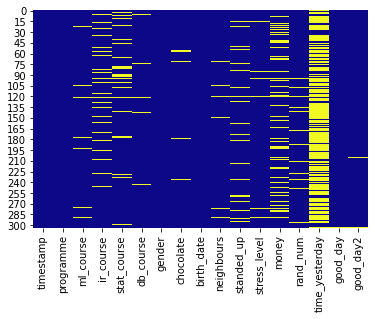

In [32]:
sns.heatmap(data.isnull(),cbar=False,cmap='plasma');

In [33]:
data.dropna().head()

,timestamp,programme,ml_course,ir_course,stat_course,db_course,gender,chocolate,birth_date,neighbours,standed_up,stress_level,money,rand_num,time_yesterday,good_day,good_day2
1,4-5-2022 12:12:07,big data,1.0,0.0,1.0,1.0,male,fat,29-02-2000,0.0,1.0,200.0,1.0,12.00,32.0,7777,8964
19,4-5-2022 12:13:08,Econometrics and Operational Research,1.0,0.0,1.0,1.0,male,fat,30.01.1997,0.0,0.0,15.0,0.0,17.00,12.0,food,tv series
28,4-5-2022 12:13:19,chrome,1.0,0.0,0.0,0.0,female,fat,02/07/1997,2.0,1.0,79.0,55.0,11.00,12.0,Movies,Coffee
29,4-5-2022 12:13:24,Computational Science,0.0,0.0,1.0,1.0,male,I have no idea what you are talking about,19-06-1998,1.0,0.0,33.0,99.0,3.14,23.3,Good food,Good weather
32,4-5-2022 12:13:26,Econometrics,1.0,0.0,1.0,1.0,male,I have no idea what you are talking about,1-1-1900,0.0,1.0,100.0,1.0,651.00,23.0,Datamining,Datamining2


### Normalizing and Scaling

In [34]:
std_scale = StandardScaler()
std_scale

StandardScaler()

In [35]:
data['stress_level'] = std_scale.fit_transform(data[['stress_level']])
data['money'] = std_scale.fit_transform(data[['money']])
data['rand_num'] = std_scale.fit_transform(data[['rand_num']])
data['time_yesterday'] = std_scale.fit_transform(data[['time_yesterday']])

In [36]:
data = data.dropna()
data.head()

,timestamp,programme,ml_course,ir_course,stat_course,db_course,gender,chocolate,birth_date,neighbours,standed_up,stress_level,money,rand_num,time_yesterday,good_day,good_day2
1,4-5-2022 12:12:07,big data,1.0,0.0,1.0,1.0,male,fat,29-02-2000,0.0,1.0,-0.058124,-0.096336,-0.058722,-0.231478,7777,8964
19,4-5-2022 12:13:08,Econometrics and Operational Research,1.0,0.0,1.0,1.0,male,fat,30.01.1997,0.0,0.0,-0.058124,-0.096347,-0.058722,-0.269145,food,tv series
28,4-5-2022 12:13:19,chrome,1.0,0.0,0.0,0.0,female,fat,02/07/1997,2.0,1.0,-0.058124,-0.095732,-0.058722,-0.269145,Movies,Coffee
29,4-5-2022 12:13:24,Computational Science,0.0,0.0,1.0,1.0,male,I have no idea what you are talking about,19-06-1998,1.0,0.0,-0.058124,-0.095240,-0.058722,-0.247863,Good food,Good weather
32,4-5-2022 12:13:26,Econometrics,1.0,0.0,1.0,1.0,male,I have no idea what you are talking about,1-1-1900,0.0,1.0,-0.058124,-0.096336,-0.058722,-0.248428,Datamining,Datamining2


In [37]:
data.describe()

,ml_course,ir_course,stat_course,db_course,neighbours,standed_up,stress_level,money,rand_num,time_yesterday
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,52.000000,5.200000e+01,52.000000
mean,0.596154,0.346154,0.865385,0.519231,2.711538,0.192308,-5.812382e-02,0.355647,-5.872202e-02,0.008042
std,0.495454,0.480384,0.344642,0.504505,6.508928,0.397959,3.503296e-17,2.171963,2.802637e-17,1.026520
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.812382e-02,-0.096347,-5.872202e-02,-0.291745
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-5.812382e-02,-0.096327,-5.872202e-02,-0.286425
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.812382e-02,-0.095788,-5.872202e-02,-0.269145
75%,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,-5.812382e-02,-0.095229,-5.872202e-02,-0.249417
max,1.000000,1.000000,1.000000,1.000000,45.000000,1.000000,-5.812382e-02,11.083148,-5.872202e-02,4.134134


## Data Visualization

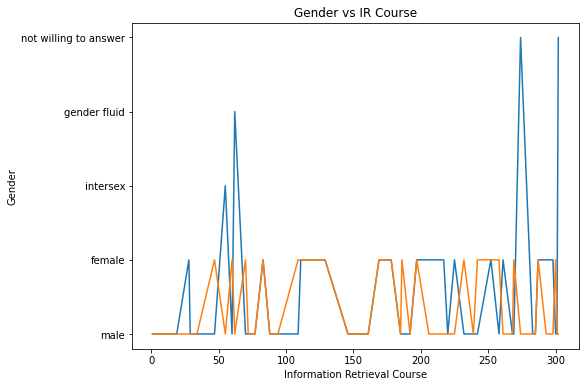

In [38]:
# scatter plot
plt.figure(figsize=(8,6))
plt.plot(data['gender'])
plt.plot(data['ir_course'])
  
# adding title to the plot
plt.title("Gender vs IR Course")
  
# setting the X and Y labels
plt.xlabel('Information Retrieval Course')
plt.ylabel('Gender');

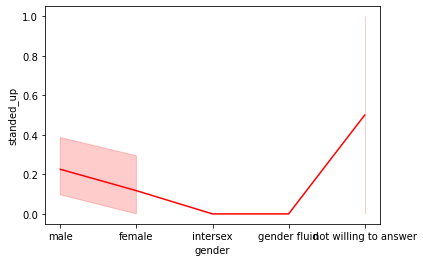

In [39]:
sns.lineplot(x="gender", y="standed_up", data=data,color="red");

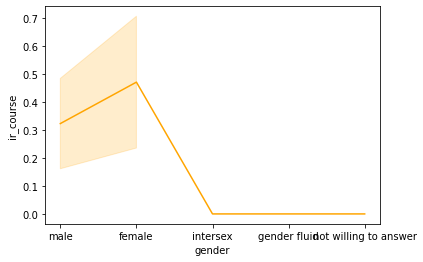

In [40]:
sns.lineplot(x="gender", y="ir_course", data=data,color="orange");

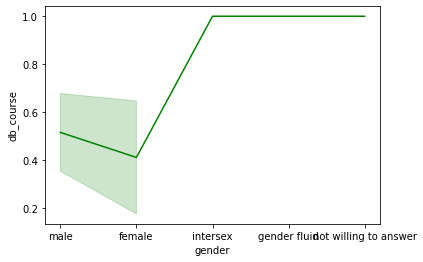

In [41]:
sns.lineplot(x="gender", y="db_course", data=data,color="green");

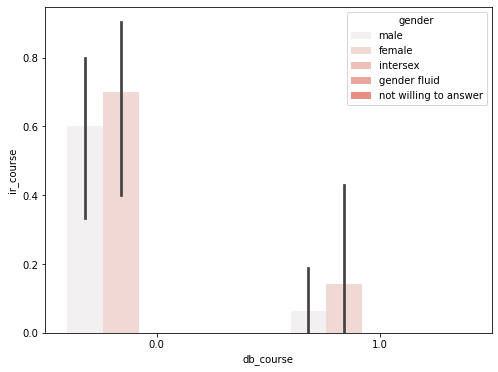

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(x='db_course',y='ir_course', data=data, hue='gender',color="salmon");

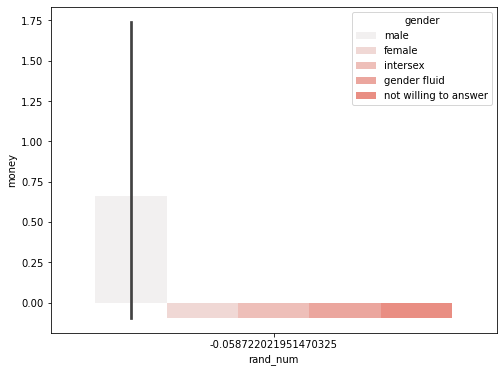

In [43]:
plt.figure(figsize=(8,6))
sns.barplot(x='rand_num',y='money', data=data, hue='gender',color="salmon");

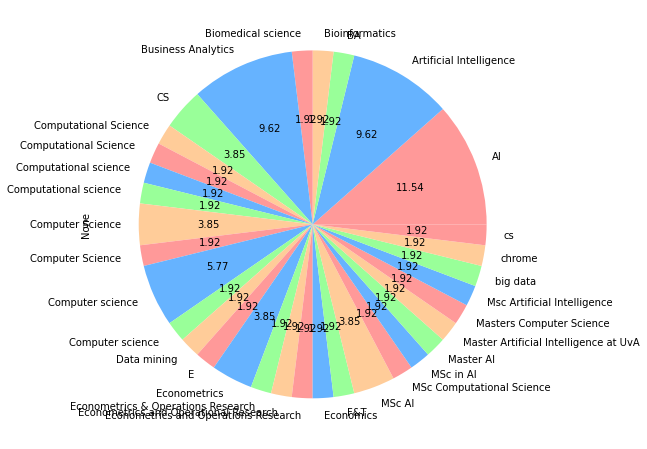

In [44]:
plt.figure(figsize=(10,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
data.groupby('programme').size().plot(kind='pie', autopct='%.2f',colors=colors)
plt.show()

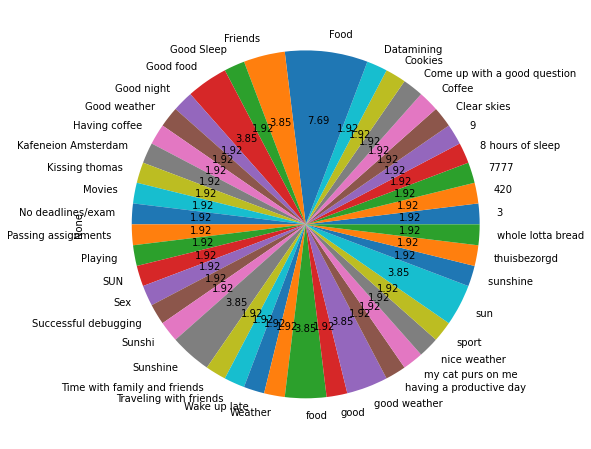

In [45]:
plt.figure(figsize=(10,8))
data.groupby('good_day').size().plot(kind='pie', autopct='%.2f')
plt.show()